<a href="https://colab.research.google.com/github/vishnuvardhan833199/ML-Projects/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

STEP-1:IMPORTING REQUIRED IMPORTANT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Titanic/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


step-3:Exploratory Data Analysis and Visualization

In [ ]:
#Exploring Data and Analysing data
df.shape

(150, 6)

150->Total NUmber of rows/tuples
6->Total Number of columns or attributes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.dtypes #Target object is species which is object and remainaing all are numeric

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [ ]:
df.isna().sum()#Missing values in our dataset

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
#No  missing values
#Lets see the distribution of data species
df["Species"].value_counts()   #Equal number of species so it is balanced dataset

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
#Lets check for noisy tuples in our dataset
print(f"Minimum value:\n{df.min()}")

Minimum value:
Id                         1
SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object


In [ ]:

print(f"Maximum value:\n{df.max()}")

Maximum value:
Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object


In [ ]:
print(f"Average value:\n{df.mean(numeric_only=True)}")

Average value:
Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64


Comparing averagevalue with maximum and minimum values there is no much deviation The datasets are considered to be noise free

#Conclusion:
i) No missing values in any tuples
ii)No noisy values in any tuples



Removing id column  from our datsets


In [ ]:
df.drop(['Id'],inplace=True,axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


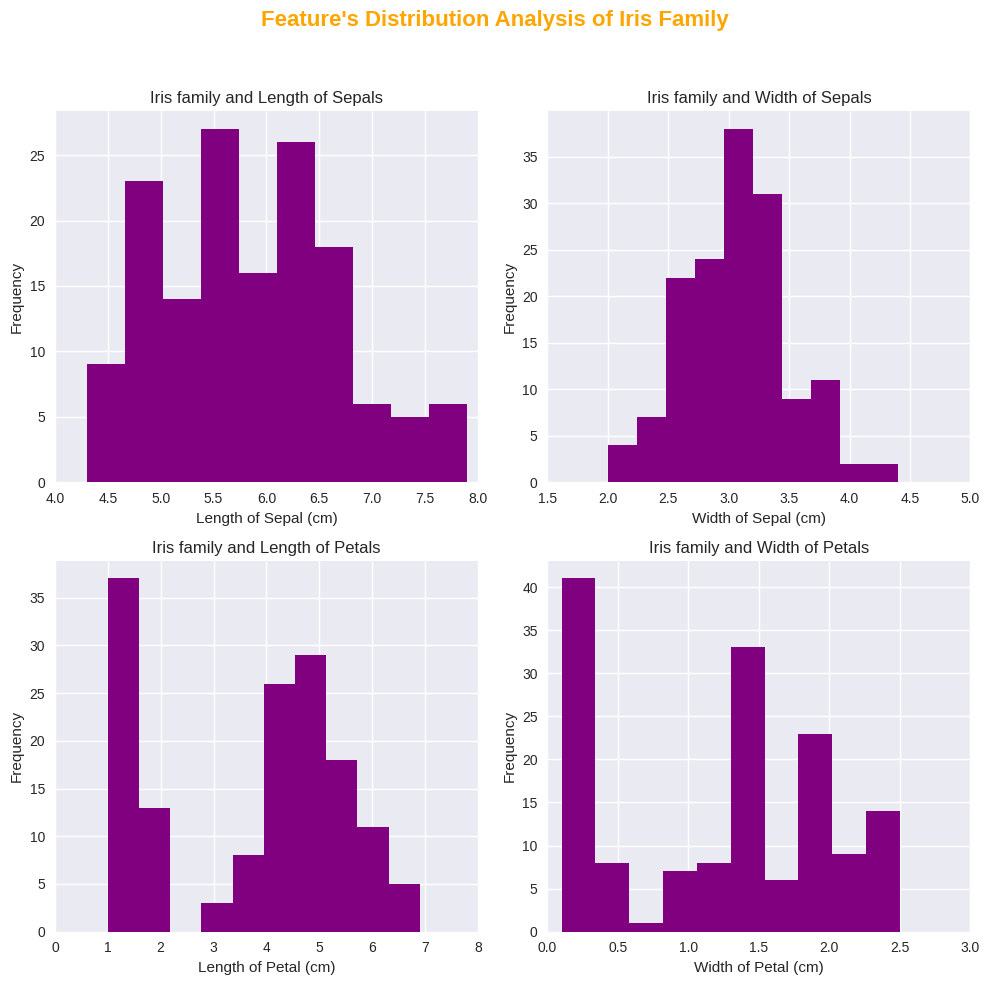

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Titanic/Iris.csv")

# Set plot style
plt.style.use("seaborn-v0_8")  # or "seaborn-darkgrid"

# Create subplots
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Histogram for Sepal Length
ax0.hist(df['SepalLengthCm'], color="purple")
ax0.set_xlim(4, 8)
ax0.set(title="Iris family and Length of Sepals", ylabel="Frequency", xlabel="Length of Sepal (cm)")

# Histogram for Sepal Width
ax1.hist(df["SepalWidthCm"], color="purple")
ax1.set_xlim(1.5, 5)
ax1.set(title="Iris family and Width of Sepals", ylabel="Frequency", xlabel="Width of Sepal (cm)")

# Histogram for Petal Length
ax2.hist(df["PetalLengthCm"], color="purple")
ax2.set_xlim(0, 8)
ax2.set(title="Iris family and Length of Petals", ylabel="Frequency", xlabel="Length of Petal (cm)")

# Histogram for Petal Width
ax3.hist(df["PetalWidthCm"], color="purple")
ax3.set_xlim(0, 3)
ax3.set(title="Iris family and Width of Petals", ylabel="Frequency", xlabel="Width of Petal (cm)")

# Add overall figure title
fig.suptitle("Feature's Distribution Analysis of Iris Family", fontsize=16, fontweight="bold", color="orange")

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#2.Scatter plot

Text(0.5, 1.0, 'Length vs Width of Sepal')

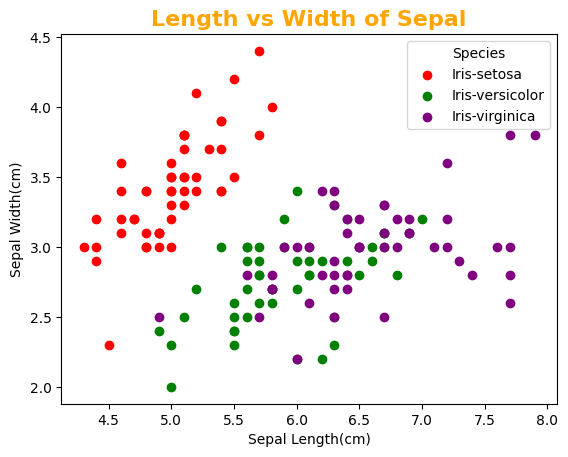

In [ ]:
plt.style.use("default")
colors=['red','green','purple']
species=["Iris-setosa","Iris-versicolor","Iris-virginica"]
for i in range(3):
    filter_species=df[df["Species"]==species[i]]
    plt.scatter(filter_species["SepalLengthCm"],filter_species["SepalWidthCm"],color=colors[i],label=species[i])
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Sepal Width(cm)")
plt.legend(title="Species")
plt.title("Length vs Width of Sepal",color="orange",fontsize=16,fontweight="bold")

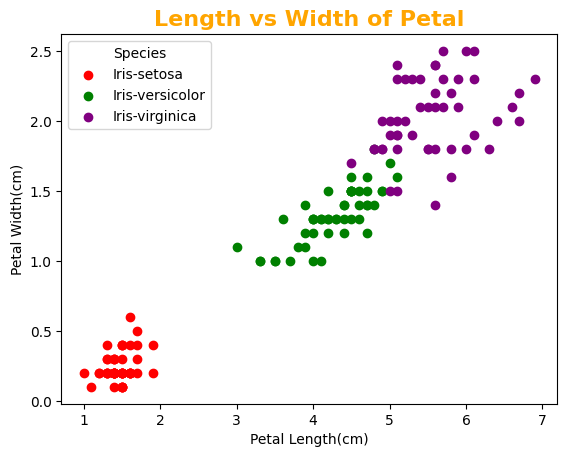

In [ ]:
for i in range(3):
    filter_species=df[df["Species"]==species[i]]
    plt.scatter(filter_species["PetalLengthCm"],filter_species["PetalWidthCm"],color=colors[i],label=species[i])
    plt.xlabel("Petal Length(cm)")
    plt.ylabel("Petal Width(cm)")
    plt.legend(title="Species")
    plt.title("Length vs Width of Petal",color="orange",fontsize=16,fontweight="bold")

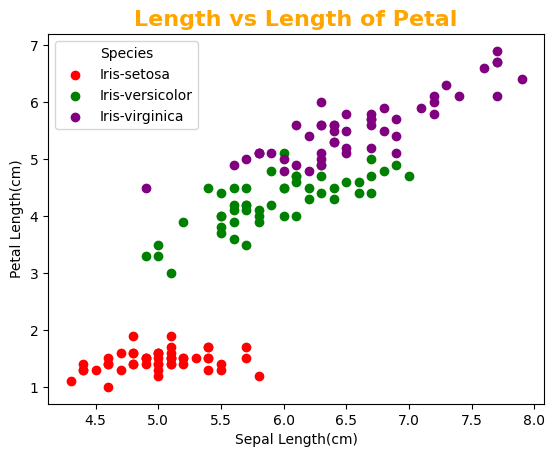

In [ ]:
for i in range(3):
    filter_species=df[df["Species"]==species[i]]
    plt.scatter(filter_species["SepalLengthCm"],filter_species["PetalLengthCm"],color=colors[i],label=species[i])
    plt.xlabel("Sepal Length(cm)")
    plt.ylabel("Petal Length(cm)")
    plt.legend(title="Species")
    plt.title("Length vs Length of Petal",color="orange",fontsize=16,fontweight="bold")

Text(0.5, 1.0, 'Width vs Width of Petal')

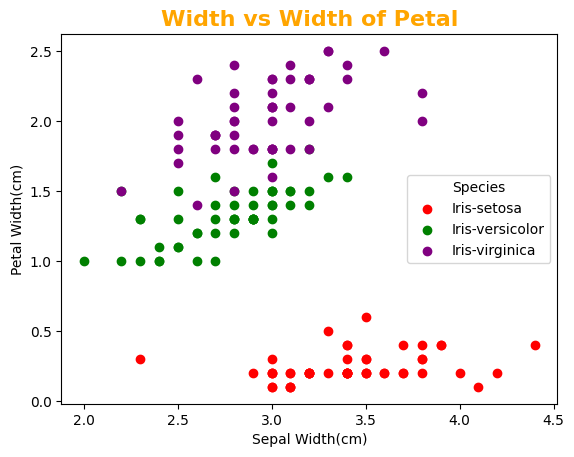

In [ ]:
for i in range(3):
    filter_species=df[df["Species"]==species[i]]
    plt.scatter(filter_species["SepalWidthCm"],filter_species["PetalWidthCm"],color=colors[i],label=species[i])
plt.xlabel("Sepal Width(cm)")
plt.ylabel("Petal Width(cm)")
plt.legend(title="Species")
plt.title("Width vs Width of Petal",color="orange",fontsize=16,fontweight="bold")

In [ ]:
#3.Correlation Matrix and HeatMap
# Compute correlation matrix only on numeric columns
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Display the matrix
print(corr)


                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


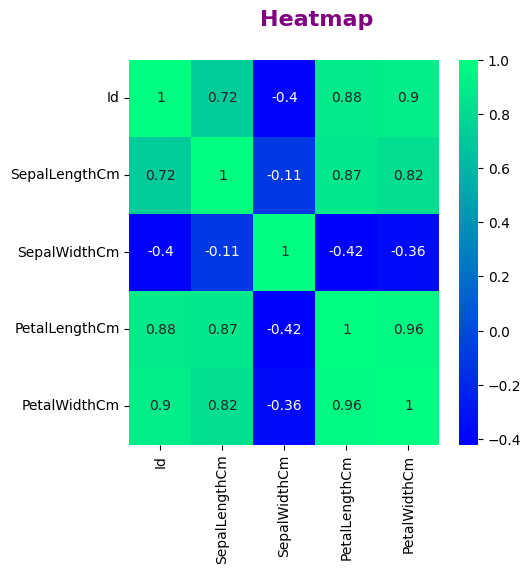

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,ax=ax,cmap="winter")
fig.suptitle(t="Heatmap",color="purple",fontsize=16,fontweight="bold");

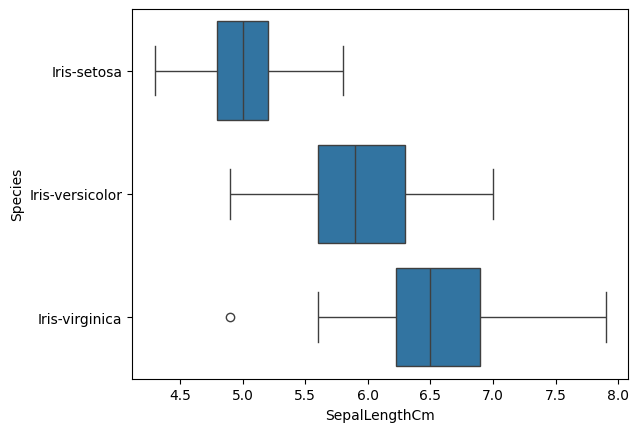

In [ ]:
#4.Boxplot
sns.boxplot(x="SepalLengthCm",y="Species",data=df);

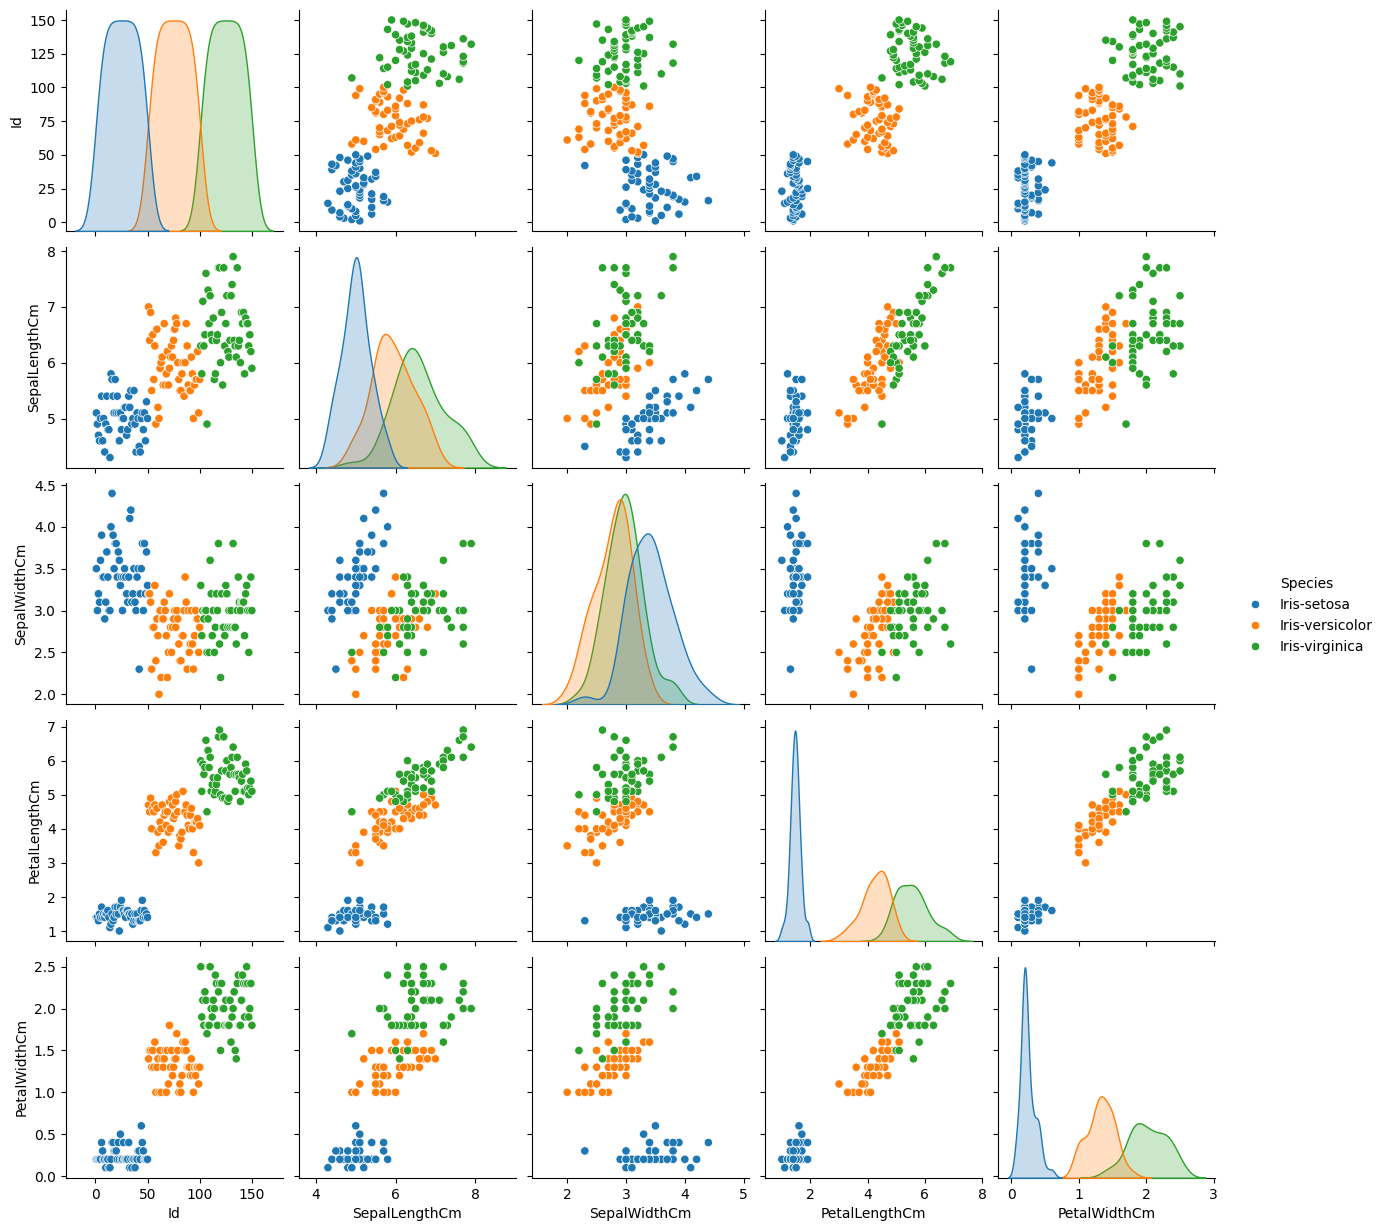

In [ ]:
#5.Pairplot
sns.pairplot(data=df,hue="Species");

Conclusion:From the data exploration and analysis, we can say that iris-setosa species are linearly seperable from other two species.Other remaining two speiecs are nor linearly seperable from ewach other

In [ ]:
#Step-4:Data Preprocessing
#1.Data cleaning
#2.Data Normalization
#3.Data Standardization
#4.Data Encoding


In [ ]:
#Step-5 Feature Engineering
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Selecting one tuple of class="iris-setosa" for prediction purpose
preds_data1=df.iloc[32]
preds_data1

,32
Id,33
SepalLengthCm,5.2
SepalWidthCm,4.1
PetalLengthCm,1.5
PetalWidthCm,0.1
Species,Iris-setosa


In [ ]:
preds_data2=df.iloc[76]
preds_data2

,76
Id,77
SepalLengthCm,6.8
SepalWidthCm,2.8
PetalLengthCm,4.8
PetalWidthCm,1.4
Species,Iris-versicolor


In [ ]:
preds_data3=df.iloc[132]
preds_data3

,132
Id,133
SepalLengthCm,6.4
SepalWidthCm,2.8
PetalLengthCm,5.6
PetalWidthCm,2.2
Species,Iris-virginica


Removing these 3 tuples from our dataset

In [ ]:
df.shape

(150, 6)

In [ ]:
df.drop([132,76,32],inplace=True)
df.shape

(147, 6)

Making x and y features

In [ ]:
x=df.drop("Species",axis=1)
y=df["Species"]

In [ ]:
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
x.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64


In [ ]:
y.dtypes

dtype('O')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Encoded Species"]=le.fit_transform(y.ravel())#Appending to our dataset
y=le.fit_transform(y.ravel())
y

<ipython-input-85-4139783710>:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  df["Encoded Species"]=le.fit_transform(y.ravel())#Appending to our dataset
<ipython-input-85-4139783710>:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y=le.fit_transform(y.ravel())


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


From this we can see encoding as
0== Iris-Setosa
1==Iris-Versicolor
2==Iris-Virginica

In [ ]:
Encoded_class=pd.DataFrame({'Species':["Iris-setosa","Iris-versicolor","Iris-virginca"],
                            'Encoded':[0,1,2]})
Encoded_class

,Species,Encoded
0,Iris-setosa,0
1,Iris-versicolor,1
2,Iris-virginca,2


Step-6:Preparing Training and Test Data and Fitting to the Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Ensure reproducibility
np.random.seed(65)

# Fix length mismatch between X and y
min_len = min(len(X), len(y))
X = X[:min_len]
y = y[:min_len]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Decision Tree
clf = DecisionTreeClassifier(criterion="gini", min_samples_split=2)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display results
print("Predictions:", y_pred)
print("Actual:", y_test)
print("Accuracy Score:", accuracy)


Predictions: [2 1 0 1 0 1 0 0 1 2 0 1 1 0 0 2 2 2 2 1 2 2 2 2 0 2 0 2 1 0]
Actual: [2 1 0 1 0 1 0 0 1 2 0 1 1 0 0 2 2 2 2 1 2 2 2 2 0 2 0 2 1 0]
Accuracy Score: 1.0


In [ ]:
#Step-7: Model Evaluation
#Metrics used for Model Evaluation
#A)CLassification Report
#B)ConfusionMatrix
#C) Accuracy Score

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_preds=clf.predict(X_test)
print(f"Classifcation Report:\n{classification_report(y_test,y_preds)}")

Classifcation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
cf_matrix=confusion_matrix(y_test,y_preds)
cf_matrix

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 12]])

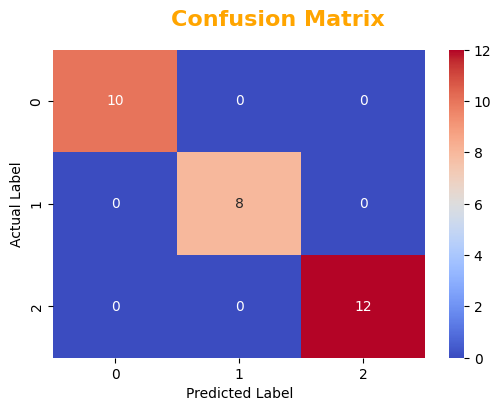

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='d')
fig.suptitle("Confusion Matrix", color="orange", fontsize=16, fontweight="bold")
ax.set(xlabel="Predicted Label", ylabel="Actual Label")
plt.show()

In [ ]:
print(f"Accuracy Score:\n\n{accuracy_score(y_test,y_preds)*100:.2f}%")


Accuracy Score:

100.00%


In [ ]:
#Visualizing the Decision Tree
from sklearn import tree

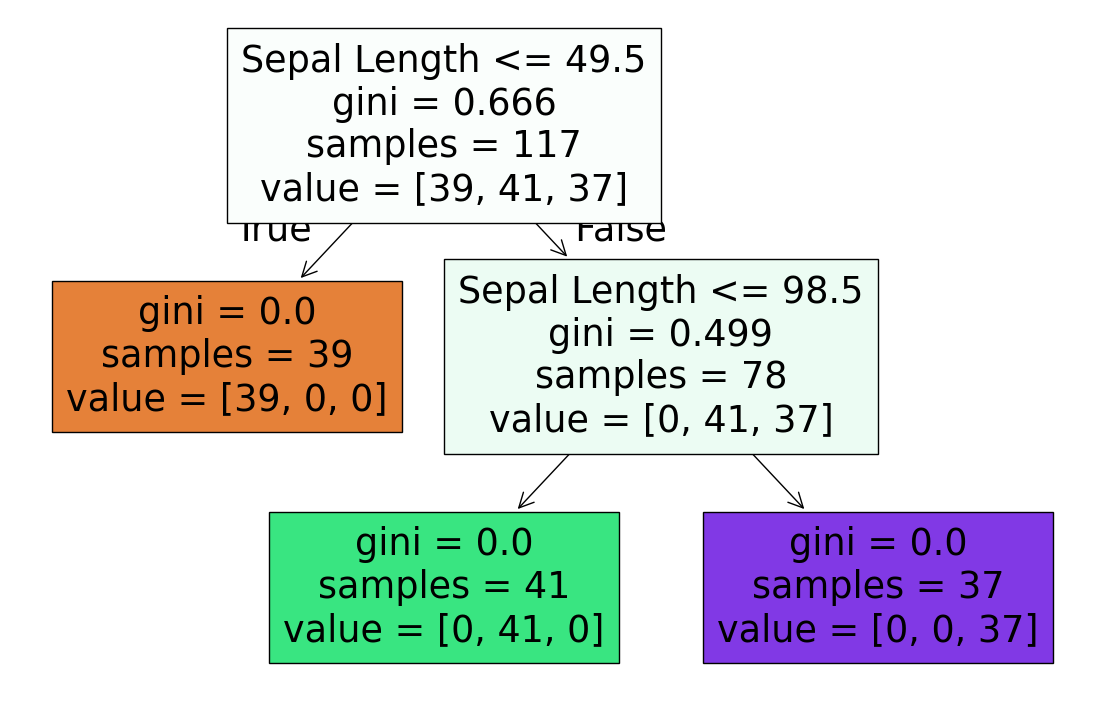

In [ ]:
plt.figure(figsize=(14,9))
tree.plot_tree(clf,filled=True,feature_names=['Sepal Length','Sepal Width','Petal Length','Petal Width']);

Step-8:Making Prediciton on Unseen Data:


In [ ]:
Encoded_class.set_index("Species")

,Encoded
Species,
Iris-setosa,0
Iris-versicolor,1
Iris-virginca,2


In [ ]:
preds_data1

,32
Id,33
SepalLengthCm,5.2
SepalWidthCm,4.1
PetalLengthCm,1.5
PetalWidthCm,0.1
Species,Iris-setosa


In [ ]:
pred_x1=pd.DataFrame(np.array([5.2,4.1,1.5,0.1]).reshape(1,-1),
columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalLengthCm'])
pred_y1=clf.predict(pred_x1)
pred_class1=Encoded_class[Encoded_class["Encoded"]==pred_y1[0]]["Species"].item()
print(f"Predicted Class:{pred_class1}")

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Id
- PetalWidthCm
